<a href="https://colab.research.google.com/github/robajo12/data301_predictive_analytics_machine_learning/blob/main/ml_projects/IMDB%20Customer_Review_Sentiment_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [77]:
imdb_df = pd.read_csv('https://raw.githubusercontent.com/niteen11/data301_predictive_analytics_machine_learning/main/data/imdb_labelled.txt',names=['message','sentiment'], sep='\t')

In [78]:
imdb_df.head()

,message,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [69]:
imdb_df.shape

(748, 2)

In [70]:
#show the missing data number
imdb_df.isnull().sum()

message      0
sentiment    0
dtype: int64

In [66]:
imdb_df['message'][0]

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '

In [71]:
max(imdb_df['message'].apply(len))

7944

In [75]:
long_msg= imdb_df[imdb_df['message'].apply(len)==7944]
long_msg.message

136     In fact, it's hard to remember that the part ...
Name: message, dtype: object

In [76]:
long_msg.message.iloc[0]

' In fact, it\'s hard to remember that the part of Ray Charles is being acted, and not played by the man himself.  \t1\nRay Charles is legendary.  \t1\nRay Charles\' life provided excellent biographical material for the film, which goes well beyond being just another movie about a musician.  \t1\nHitchcock is a great director.  \t1\nIronically I mostly find his films a total waste of time to watch.  \t0\nSecondly, Hitchcock pretty much perfected the thriller and chase movie.  \t1\nIt\'s this pandering to the audience that sabotages most of his films.  \t0\nHence the whole story lacks a certain energy.  \t0\nThe plot simply rumbles on like a machine, desperately depending on the addition of new scenes.  \t0\nThere are the usual Hitchcock logic flaws.  \t0\nMishima is extremely uninteresting.  \t0\nThis is a chilly, unremarkable movie about an author living/working in a chilly abstruse culture.  \t0\nThe flat reenactments don\'t hold your attention because they are emotionally adrift and

In [14]:
import string

In [79]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [80]:
from nltk.corpus import stopwords

In [81]:
stopwords.words('english')[0:15]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours']

# Function 
### To Automate the text data pre processing part

In [82]:

def message_text_pre_process(text_message):
  remove_punct = [char for char in text_message if char not in string.punctuation]
  remove_punct = ''.join(remove_punct)
  remove_stopwords = [word for word in remove_punct.split() if word.lower() not in stopwords.words('english')]
  return remove_stopwords

In [83]:
imdb_df['message'].head(10).apply(message_text_pre_process)

0    [slowmoving, aimless, movie, distressed, drift...
1    [sure, lost, flat, characters, audience, nearl...
2    [Attempting, artiness, black, white, clever, c...
3                     [little, music, anything, speak]
4    [best, scene, movie, Gerardo, trying, find, so...
5    [rest, movie, lacks, art, charm, meaning, empt...
6                                 [Wasted, two, hours]
7    [Saw, movie, today, thought, good, effort, goo...
8                                   [bit, predictable]
9    [Loved, casting, Jimmy, Buffet, science, teacher]
Name: message, dtype: object

In [84]:
imdb_df.head()

,message,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


# Vectorization

In [85]:
from sklearn.feature_extraction.text import CountVectorizer

In [86]:
bag_of_words = CountVectorizer(analyzer=message_text_pre_process).fit(imdb_df['message'])

In [87]:
bag_of_words_trf = bag_of_words.transform(imdb_df['message'])

# TF-IDF (Transformer)

In [88]:
from sklearn.feature_extraction.text import TfidfTransformer

In [89]:
tfidf_fit = TfidfTransformer().fit(bag_of_words_trf)

In [90]:
tfidf_trf = tfidf_fit.transform(bag_of_words_trf)

# Model Building

In [91]:
imdb_dffrom sklearn.naive_bayes import MultinomialNB

In [98]:
custFeelng_detector_model = MultinomialNB().fit(tfidf_trf,imdb_df['sentiment'])

In [94]:
test_message = imdb_df['message'][10]

In [95]:
bag_of_words_test_message = bag_of_words.transform([test_message])

In [96]:
tfidf_test_messsge = tfidf_fit.transform(bag_of_words_test_message)

In [99]:
custFeelng_detector_model.predict(tfidf_test_messsge)[0]

1

In [133]:
imdb_df['sentiment'][0]

0

In [107]:
prediction_for_all_messages = custFeelng_detector_model.predict(tfidf_trf)

In [136]:
from sklearn.metrics import accuracy_score
accuracy_score(imdb_df['sentiment'],prediction_for_all_messages)

0.9799465240641712

In [138]:
from sklearn.metrics import confusion_matrix
confusion_matrix(imdb_df['sentiment'],prediction_for_all_messages)

array([[354,   8],
       [  7, 379]])

Text(0.5, 1.0, 'Pipeline-Confusion Matrix')

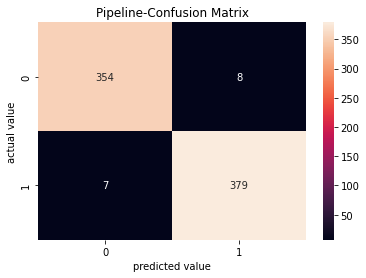

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
cm = confusion_matrix(imdb_df['sentiment'],prediction_for_all_messages)
sns.heatmap(cm,annot=True,fmt='0.0f')
plt.ylabel('actual value')
plt.xlabel('predicted value')
plt.title(f'Pipeline-Confusion Matrix')

In [45]:
from sklearn.metrics import classification_report

In [108]:
print(classification_report(imdb_df['sentiment'],prediction_for_all_messages))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       362
           1       0.98      0.98      0.98       386

    accuracy                           0.98       748
   macro avg       0.98      0.98      0.98       748
weighted avg       0.98      0.98      0.98       748



### Observation & Conclusion

  The model has a precision and an accuracy score of .98. it means that the model is making good predictions at 98%. So, the model is suitable for predicting the sentiment of the customer.